Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [2]:
library('tidyverse')
library('palmerpenguins')

We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing *individual measurement values* by the *maximum value* within the measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [40]:
# pivot data

penguins.final = penguins %>%
    mutate(id = row_number()) %>%
    pivot_longer(c(bill_length_mm, bill_depth_mm, flipper_length_mm)) %>%
    group_by(name) %>%
    mutate(normalized.value = value / max(value, na.rm = TRUE)) %>%
    ungroup()

penguins.final %>% head

species,island,body_mass_g,sex,year,id,name,value,normalized.value
<fct>,<fct>,<int>,<fct>,<int>,<int>,<chr>,<dbl>,<dbl>
Adelie,Torgersen,3750,male,2007,1,bill_length_mm,39.1,0.6560403
Adelie,Torgersen,3750,male,2007,1,bill_depth_mm,18.7,0.8697674
Adelie,Torgersen,3750,male,2007,1,flipper_length_mm,181.0,0.7835498
Adelie,Torgersen,3800,female,2007,2,bill_length_mm,39.5,0.6627517
Adelie,Torgersen,3800,female,2007,2,bill_depth_mm,17.4,0.8093023
Adelie,Torgersen,3800,female,2007,2,flipper_length_mm,186.0,0.8051948


Now make the chart.

Warning message:
“Removed 6 rows containing missing values (geom_point).”


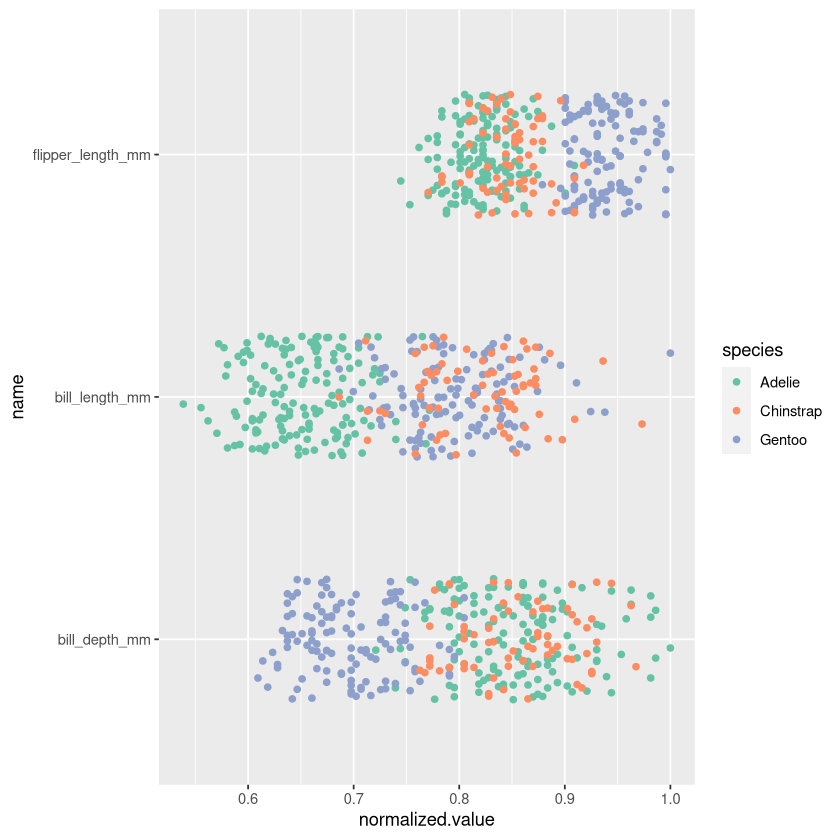

In [43]:
p = ggplot(penguins.final, aes(x = normalized.value, y = name, color = species))

p = p + geom_point(position = position_jitter(h = .25, w = 0))

p = p + scale_color_brewer(palette = "Set2")

p